In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **LOAD DATA**

In [2]:
claims = pd.read_csv('claims_data.csv')
claims.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


## **EXPLORATORY DATA ANALYSIS**

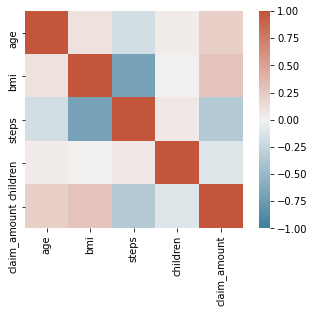

In [3]:
corr = claims.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True)

The correlation heatmap shows the relationship between the numerical columns in the dataset. With a correlation of 1 showing the highest positive correlation between two features and -1 showing the highest negative correlation between two features.

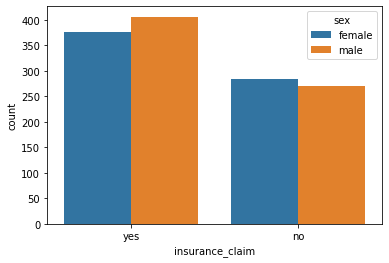

In [4]:
ax = sns.countplot(x="insurance_claim", hue="sex", data=claims)

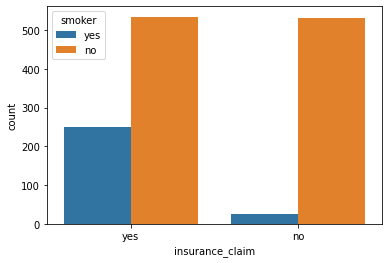

In [5]:
ax = sns.countplot(x="insurance_claim", hue="smoker", data=claims)

The two countplots above show how smoker status and gender affects whether or not the customer claimed. It is clear that more males claim than females and more non-smokers claim than smokers.

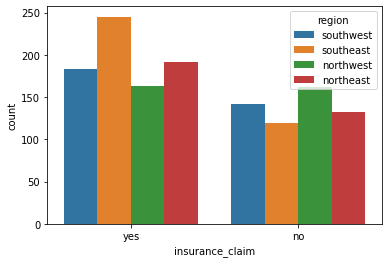

In [20]:
ax = sns.countplot(x="insurance_claim", hue="region", data=claims)

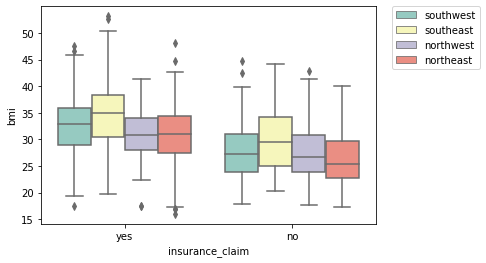

In [6]:
ax = sns.boxplot(x="insurance_claim", y="bmi", hue="region",
                 data=claims, palette="Set3")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The boxplot and barplot above shows how bmi and region affects whether or not a customer claims. Customers in the southeast region shows to have the highest average bmi between the customers who claim while customers in the northeast show to have the lowest bmi's on average. It is clear from the barplot that more customers in the southeast region are claiming with northeast having the least customers claiming. Therefore, it is safe to assume that the customer's bmi has a negative correlation with whether or not a customer claims. 

No handles with labels found to put in legend.


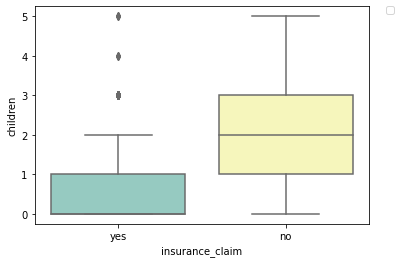

In [7]:
ax = sns.boxplot(x="insurance_claim", y="children",
                 data=claims, palette="Set3")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Customers with more children tend not to claim.

No handles with labels found to put in legend.


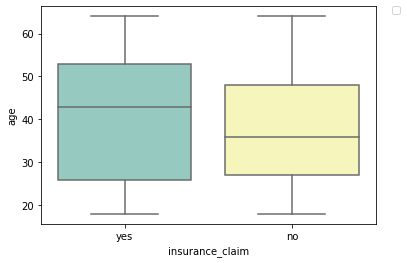

In [8]:
ax = sns.boxplot(x="insurance_claim", y="age",
                 data=claims, palette="Set3")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Older customers tend to claim more compared to younger customers.

## **MODELING**

In [9]:
# SPLITTING DATASET INTO FEATURES AND LABELS
 
y = claims['insurance_claim']
X = claims.drop('insurance_claim', axis=1)

In [10]:
# TRANSFORM THE CATEGORICAL DATA INTO NUMERICAL DATA

X = pd.get_dummies(X, drop_first=True)

In [11]:
# SPLITTING INTO TRAIN AND TEST SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**LOGISTIC REGRESSION MODEL**

In [12]:
# FIT THE MODEL TO THE TRAINING SET

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# USE THE MODEL TO PREDICT Y VALUES 

y_pred = lr.predict(X_test)

**XGBOOST MODEL**

In [14]:
xg =  XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
y_pred2 = xg.predict(X_test)

## **EVALUATE MODELS**

**LOGISTIC REGRESSION**

In [16]:
accuracy_score(y_test, y_pred)

1.0

In [17]:
confusion_matrix(y_test, y_pred)

array([[171,   0],
       [  0, 231]])

**XGBOOST**

In [18]:
accuracy_score(y_test, y_pred2)

1.0

In [19]:
confusion_matrix(y_test, y_pred2)

array([[171,   0],
       [  0, 231]])

## **CONCLUSION**

Both models produced 100% accuracy.